In [1]:
!wget http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/apple.jpg
!wget http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/orange.jpg

--2022-08-29 18:45:24--  http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/apple.jpg
Resolving pages.cs.wisc.edu (pages.cs.wisc.edu)... 128.105.7.9
Connecting to pages.cs.wisc.edu (pages.cs.wisc.edu)|128.105.7.9|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/apple.jpg [following]
--2022-08-29 18:45:24--  https://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/apple.jpg
Connecting to pages.cs.wisc.edu (pages.cs.wisc.edu)|128.105.7.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51705 (50K) [image/jpeg]
Saving to: ‘apple.jpg’

apple.jpg           100%[===================>]  50.49K  --.-KB/s    in 0.08s   

2022-08-29 18:45:24 (646 KB/s) - ‘apple.jpg’ saved [51705/51705]

--2022-08-29 18:45:24--  http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/orange.jpg
Resolving pages.cs.wisc.edu (pages.cs.wisc.edu)... 128.105.7.9
Connecting to pages.cs.wisc.edu (pages.cs.wisc.e

# Image Blending

In this assignment you should implement the blending of the two images. You can download images with the cell above.

In order to blend the images, you should follow the following steps:

1. Construct the Laplacian Pyramids for each image
2. Now we should blend two pyramids: construct the third pyramid where you take first half of the image from the left pyramid and second half of the image from the right pyramid.
3. Reconstruct the original image with the new merged pyramid

You should obtain the following result:

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
im_apple = plt.imread('apple.jpg')
im_orange = plt.imread('orange.jpg')
print(im_apple.shape)
print(im_orange.shape)

(512, 512, 3)
(512, 512, 3)


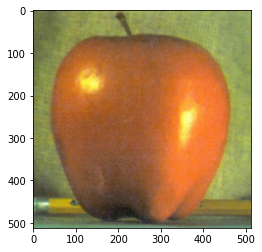

In [4]:
plt.imshow(im_apple)

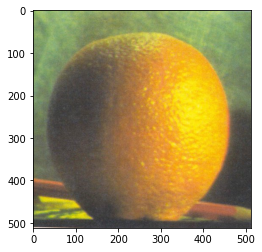

In [5]:
plt.imshow(im_orange)

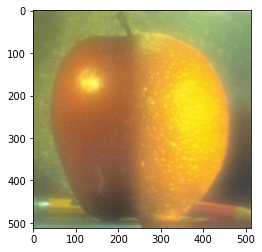

In [6]:
# generate Gaussian pyramid for Apple
G = im_apple.copy()
gpA = [G]
for i in range(6):
  G = cv2.pyrDown(G)
  gpA.append(G)

# generate Gaussian pyramid for Orange
G = im_orange.copy()
gpB = [G]
for i in range(6):
  G = cv2.pyrDown(G)
  gpB.append(G)

# generate Laplacian Pyramid for Apple
lpA = [gpA[5]]
for i in range(5,0,-1):
  GE = cv2.pyrUp(gpA[i])
  L = cv2.subtract(gpA[i-1],GE)
  lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
  GE = cv2.pyrUp(gpB[i])
  L = cv2.subtract(gpB[i-1],GE)
  lpB.append(L)

# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
  rows,cols,dpt = la.shape
  ls = np.hstack((la[:,0:int(cols/2)], lb[:,int(cols/2):]))
  LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
  ls_ = cv2.pyrUp(ls_)
  ls_ = cv2.add(ls_, LS[i])

plt.imshow(ls_)

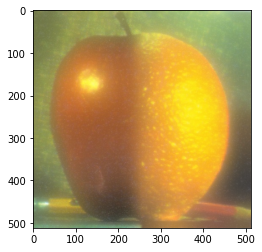

In [7]:
!wget https://surfertas.github.io/static/img/posts/eye.png
!wget https://surfertas.github.io/static/img/posts/mask.png
!wget https://surfertas.github.io/static/img/posts/hand.png

--2022-08-29 18:45:49--  https://surfertas.github.io/static/img/posts/eye.png
Resolving surfertas.github.io (surfertas.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to surfertas.github.io (surfertas.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352991 (345K) [image/png]
Saving to: ‘eye.png’

eye.png             100%[===================>] 344.72K  --.-KB/s    in 0.03s   

2022-08-29 18:45:49 (10.1 MB/s) - ‘eye.png’ saved [352991/352991]

--2022-08-29 18:45:50--  https://surfertas.github.io/static/img/posts/mask.png
Resolving surfertas.github.io (surfertas.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to surfertas.github.io (surfertas.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23812 (23K) [image/png]
Saving to: ‘mask.png’

mask.png            100%[===================>]  23.25K  --.-KB/s    in 0.001s  

2022-08

# Image Blending with Mask

In general, we can have an arbirtary mask and blend two images according to this mask. The procedure is the following:

1. Construct laplacian pyramids for 2 images that you want to blend
2. Construct gaussian pyramid for a mask
3. Compute weighted sum for each level of the pyramid
$$
L = L_1 \alpha + L_2 (1 - \alpha)
$$

4. Reconstruct the image from the blended pyramid

You should obtain the following result.

(1260, 960, 3)
(1260, 960)
(1260, 960, 3)


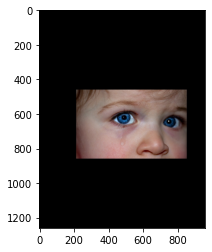

In [75]:
eye_img = plt.imread('eye.png')
mask = plt.imread('mask.png')
hand_img = plt.imread('hand.png')

print(eye_img.shape)
print(mask.shape)
print(hand_img.shape)

plt.imshow(eye_img)

(1260, 960)


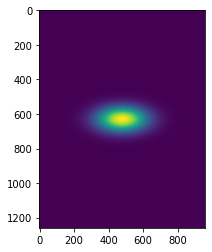

In [76]:
plt.imshow(mask)
print(mask.shape)

(1260, 960, 3)


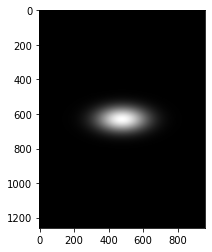

In [77]:
mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
plt.imshow(mask)
print(mask.shape)

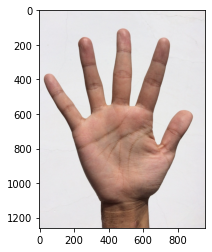

In [78]:
plt.imshow(hand_img)

In [79]:
# generate Gaussian pyramid 
G = eye_img.copy()
print('0 ', G.shape)
gpEye = [G]
for i in range(6):
  w = int(G.shape[1] / 2)
  h = int(G.shape[0] / 2)
  G = cv2.pyrDown(G, dstsize = (w, h))
  print(i+1, ' ', G.shape)
  gpEye.append(G)

G = hand_img.copy()
gpHand = [G]
for i in range(6):
  w = int(G.shape[1] / 2)
  h = int(G.shape[0] / 2)
  G = cv2.pyrDown(G, dstsize = (w, h))
  gpHand.append(G)

G = mask.copy()
gpMask = [G]
for i in range(6):
  w = int(G.shape[1] / 2)
  h = int(G.shape[0] / 2)
  G = cv2.pyrDown(G, dstsize = (w, h))
  gpMask.append(G)

gpMask.reverse()

0  (1260, 960, 3)
1   (630, 480, 3)
2   (315, 240, 3)
3   (157, 120, 3)
4   (78, 60, 3)
5   (39, 30, 3)
6   (19, 15, 3)


In [80]:
# generate Laplacian Pyramid 

lpEye = [gpEye[6]]
for i in range(6,0,-1):
  newSz = gpEye[i-1].shape[0:2]
  GE = cv2.pyrUp(gpEye[i], dstsize=(newSz[1],newSz[0]))
  print(GE.shape, ' ', gpEye[i-1].shape)
  L = cv2.subtract(gpEye[i-1],GE)
  lpEye.append(L)

lpHand = [gpHand[6]]
for i in range(6,0,-1):
  newSz = gpHand[i-1].shape[0:2]
  GE = cv2.pyrUp(gpHand[i], dstsize=(newSz[1],newSz[0]))
  L = cv2.subtract(gpHand[i-1],GE)
  lpHand.append(L)

(39, 30, 3)   (39, 30, 3)
(78, 60, 3)   (78, 60, 3)
(157, 120, 3)   (157, 120, 3)
(315, 240, 3)   (315, 240, 3)
(630, 480, 3)   (630, 480, 3)
(1260, 960, 3)   (1260, 960, 3)


(19, 15, 3)
(39, 30, 3)
(78, 60, 3)
(157, 120, 3)
(315, 240, 3)
(630, 480, 3)
(1260, 960, 3)
(19, 15, 3) (39, 30, 3)
(39, 30, 3) (78, 60, 3)
(78, 60, 3) (157, 120, 3)
(157, 120, 3) (315, 240, 3)
(315, 240, 3) (630, 480, 3)


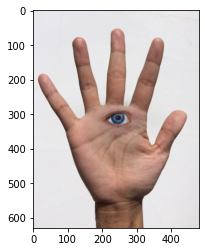

In [81]:
# Now let's blend
LS = []
for la,lb,mask in zip(lpHand, lpEye, gpMask):
  ls = lb * mask + la * (1.0 - mask)
  print(ls.shape)
  LS.append(ls)

# now reconstruct
ls_ = LS[0]
for i in range(1,6):
  newSz = LS[i].shape[0:2]
  print(ls_.shape, LS[i].shape )
  ls_ = cv2.pyrUp(ls_, dstsize=(newSz[1],newSz[0]))
  ls_ = cv2.add(ls_, LS[i])

plt.imshow(ls_)

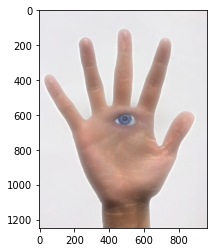